In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('oasis_long.csv')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [36]:
data.shape

(373, 15)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [38]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [39]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [40]:
data_u = data.sort_values('Visit', ascending=False).drop_duplicates('Subject ID').reset_index()
data_u = data_u.sort_values('Subject ID').reset_index()
data_u = data_u.drop(['level_0', 'index'], axis=1)

In [41]:
data_u.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
1,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
2,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
3,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
4,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279


In [42]:
data_u.shape

(150, 15)

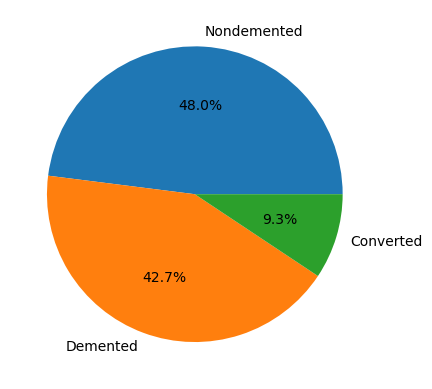

In [43]:
#sns.countplot(x='Group', data=data_u, order=data_u['Group'].value_counts().index)
plt.pie(data_u['Group'].value_counts(), labels=data_u['Group'].unique(), autopct='%1.1f%%')
plt.show()

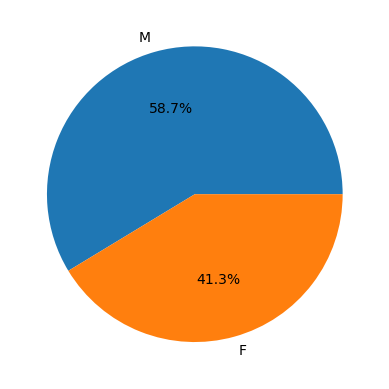

In [44]:
plt.pie(data_u['M/F'].value_counts(), labels=data_u['M/F'].unique(), autopct='%1.1f%%')
plt.show()

In [45]:
def age_range(age):
    if 60 <= age <= 65:
        return '60-65'
    elif 66 <= age <= 70:
        return '66-70'
    elif 71 <= age <= 80:
        return '71-80'
    elif 81 <= age <= 90:
        return '81-90'
    else:
        return '+90'

In [46]:
age_index = data_u.columns.get_loc('Age')
data_u.insert(age_index + 1, 'Age_range', data_u['Age'].apply(age_range))

#data_u['Age_range'] = data_u['Age'].apply(age_range)

In [47]:
data_u

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,Age_range,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,81-90,14,2.0,30.0,0.0,2004,0.681,0.876
1,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,71-80,12,NaN,22.0,0.5,1698,0.701,1.034
2,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,81-90,18,3.0,27.0,0.0,1200,0.718,1.462
3,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,81-90,12,4.0,30.0,0.0,1699,0.705,1.033
4,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,71-80,16,NaN,27.0,1.0,1372,0.710,1.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,OAS2_0182_MR2,Demented,2,776,M,R,75,71-80,12,NaN,20.0,0.5,1654,0.696,1.061
146,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,71-80,13,2.0,30.0,0.0,1510,0.723,1.162
147,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,71-80,16,3.0,21.0,1.0,1351,0.708,1.299
148,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,81-90,16,1.0,26.0,0.5,1688,0.675,1.040


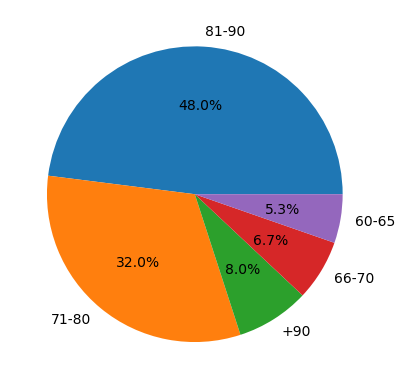

In [48]:
plt.pie(data_u['Age_range'].value_counts(), labels=data_u['Age_range'].unique(), autopct='%1.1f%%')
plt.show()